In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import helper
import data_loading
import time

In [2]:
train_data, test_data = data_loading.get_data()

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
28709 7178


In [13]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.module = nn.Sequential(
            nn.Conv2d(1, 16, (3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, (3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 10 * 10, 512),
            nn.Sigmoid(),
            nn.Linear(512, 64),
            nn.Sigmoid(),
            nn.Linear(64, 7),
            nn.Softmax(dim=1)           
        )
    
    def forward(self, x):
        return self.module(x)
    
device = "cuda"
model = Model().to(device)
# print(model)

total_params = 0
for p in model.parameters():
    # print(p.shape, p.numel())
    total_params += p.numel()
print(f"total_params : {total_params:,}")

total_params : 1,676,999


In [14]:
results = []

In [15]:
batch = 1024
epoch = 10
lr = 1e-4

train_data_loader = DataLoader(train_data, batch_size=batch, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch, shuffle=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

for _ in range(epoch):
    s = time.time()
    results.append(helper.fit(model, 
                              train_data_loader,
                              test_data_loader,
                              loss_fn,
                              optimizer,
                              device 
                            )
                    )
    e = time.time()
    e = round(e - s, 3)
    print(_, e, results[-1], sep = "\t")

0	2.659	[1.9286934219557663, 25.13149186666202, 1.9174377620220184, 24.714405126776263]
1	2.462	[1.9075649401237225, 25.13149186666202, 1.8927856385707855, 24.714405126776263]
2	2.481	[1.902887985624116, 25.13149186666202, 1.9017765074968338, 24.714405126776263]
3	2.534	[1.9016528047364334, 25.13149186666202, 1.8999385684728622, 24.714405126776263]
4	2.457	[1.9011626901297733, 25.13149186666202, 1.8980490863323212, 24.714405126776263]
5	2.449	[1.8999863040858302, 25.13149186666202, 1.9022876471281052, 24.714405126776263]
6	2.456	[1.8970224240730549, 25.13149186666202, 1.9064334481954575, 24.714405126776263]
7	2.45	[1.8965246184118862, 25.13149186666202, 1.9069553315639496, 24.714405126776263]
8	2.466	[1.8978769532565414, 25.13149186666202, 1.8866901397705078, 24.714405126776263]
9	2.45	[1.8979725961027474, 25.13149186666202, 1.9156203269958496, 24.714405126776263]


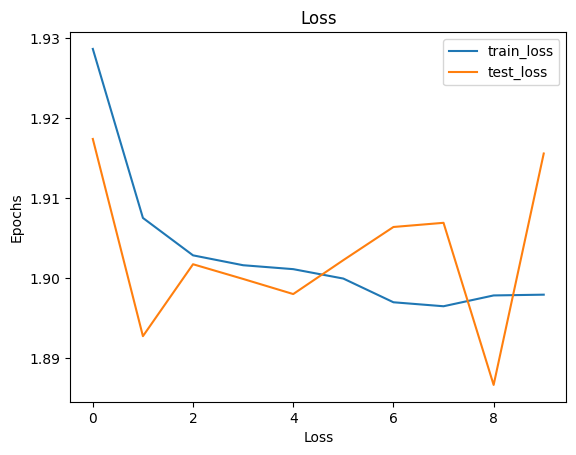

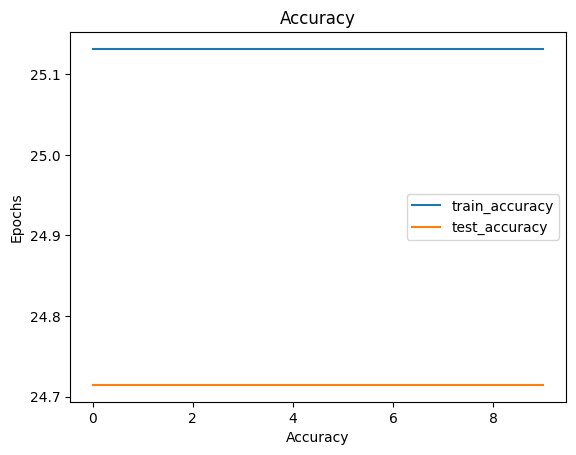

In [16]:
results = np.array(results)
helper.plot_result(results)

In [12]:
1/0

ZeroDivisionError: division by zero

In [17]:
with torch.no_grad():
    pred = model(X)

In [19]:
pred.argmax(1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [20]:
y

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6], device='cuda:0')

In [16]:
for X, y in test_data_loader:
    X, y = X.to(device), y.to(device)

In [ ]:
y = [_[1] for _ in train_data]

In [ ]:
dict(Counter(y))

{0: 3995, 1: 436, 2: 4097, 3: 7215, 4: 4965, 5: 4830, 6: 3171}

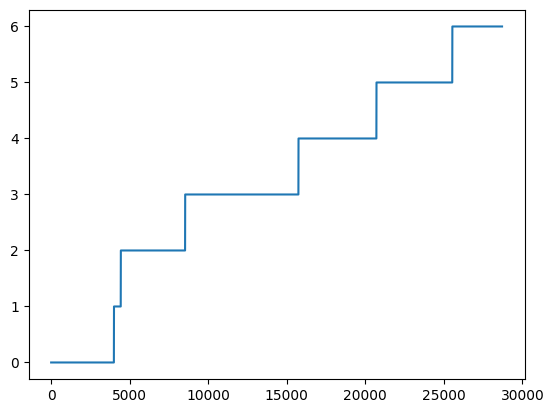

In [ ]:
plt.plot(y)

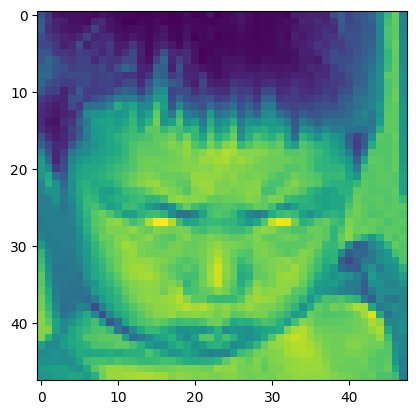

In [ ]:
plt.imshow((train_data[0][0].squeeze()))

In [ ]:
train_data[0][0]

tensor([[[0.1961, 0.1255, 0.0588,  ..., 0.5216, 0.5922, 0.3373],
         [0.2235, 0.1333, 0.0863,  ..., 0.5412, 0.5922, 0.3490],
         [0.2392, 0.1176, 0.0941,  ..., 0.5569, 0.5843, 0.3490],
         ...,
         [0.4039, 0.3922, 0.3922,  ..., 0.5843, 0.4078, 0.3333],
         [0.4196, 0.4353, 0.4431,  ..., 0.5922, 0.4706, 0.3373],
         [0.4078, 0.4078, 0.4392,  ..., 0.5608, 0.5333, 0.3255]]])